## Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Numba accelerator

In [27]:
@njit(fastmath=True)
def solve_1d_linearconv(u, un, nt, nx, dt, dx, c):

    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

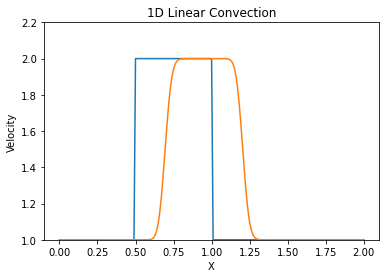

In [28]:
nx = 201  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 50    #nt is the number of timesteps we want to calculate
c = 1      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv(u, un, nt, nx, dt, dx, c)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions using timeit

### Pure function

In [31]:
%timeit solve_1d_linearconv.py_func(u, un, nt, nx, dt, dx, c)

7.97 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Function with numba accelerator

In [32]:
%timeit solve_1d_linearconv(u, un, nt, nx, dt, dx, c)

14.2 µs ± 925 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
